<a href="https://colab.research.google.com/github/MO230101/The-codes-for-hydrogel-study-/blob/main/Savitzky_Goley_TDNMR_for_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-1031a0e3b738>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_smoothed[target_column] = signal.savgol_filter(df[target_column], window_length=window_length, polyorder=polyorder)
<ipython-input-1-1031a0e3b738>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_smoothed[target_column] = signal.savgol_filter(df[target_column], window_length=window_length, polyorder=polyorder)
<ipython-input-1-1031a0e3b738>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

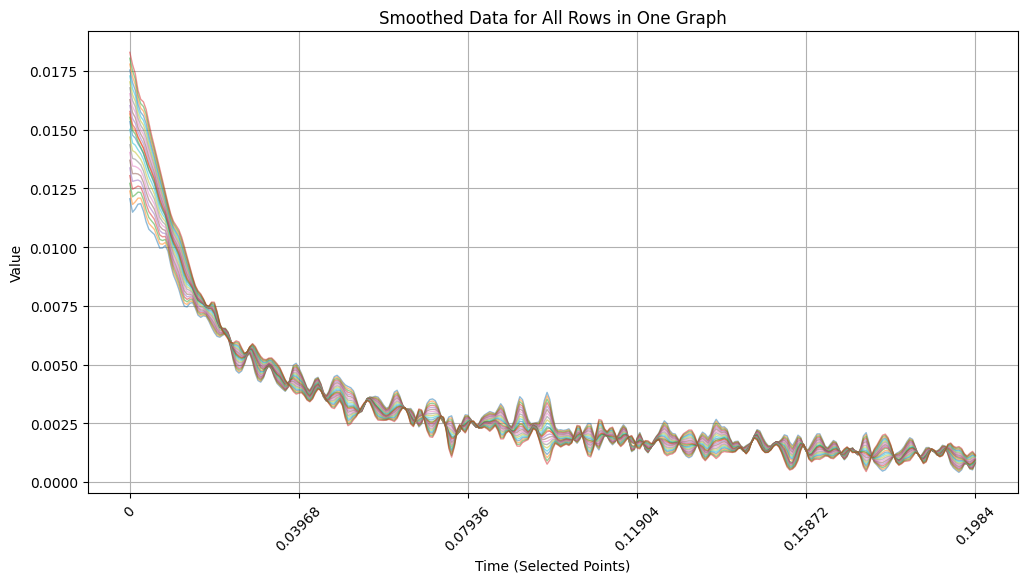

In [ ]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv("file_name.csv", index_col=0)

# Savitzky-Golay フィルタ設定
window_length = 23  # ウィンドウ長
polyorder = 1 # 多項式の次数

# 対象列を選択
target_columns = df.columns

# 処理データ保存用のDataFrame（元の列名を保持）
df_smoothed = pd.DataFrame(index=df.index)

# 各列にフィルタを適用
for target_column in target_columns:
    # NaN がある場合はスキップ
    if df[target_column].isnull().any():
        print(f"Skipping column '{target_column}' due to NaN values.")
        continue

    # Savitzky-Golay フィルタを適用
    df_smoothed[target_column] = signal.savgol_filter(df[target_column], window_length=window_length, polyorder=polyorder)

# CSV保存（元データの列名を維持）
df_smoothed.to_csv('smoothed_data_only.csv', index=True)

# すべての行を1つのグラフにプロット
plt.figure(figsize=(12, 6))
for idx in df_smoothed.index:
    plt.plot(df_smoothed.columns, df_smoothed.loc[idx], alpha=0.5, linewidth=1)  # 各行のデータを透明度0.5で表示

# X軸のラベルを5つに制限
num_xticks = 5
x_labels = df_smoothed.columns[::max(1, len(df_smoothed.columns) // num_xticks)]  # 均等に5つ選択
plt.xticks(x_labels, rotation=45)  # 適切な間隔でX軸のラベルを設定

plt.xlabel("Time (Selected Points)")
plt.ylabel("Value")
plt.title("Smoothed Data for All Rows in One Graph")
plt.grid(True)

plt.show()
